---
<h1><B> Deep Learning (AI2100/AI5100)  </h1></B></center>

---

<table>
<tr> 
<td><h3> Assignment : </td>
<td><h3> 2 </td>
</tr>
<tr> 
<td><h3> Name : </td>
<td><h3> Manan Darji </td>
</tr>
<tr> 
<td><h3> Roll Number : </td>
<td> <h3>CS22MTECH14004 </td>
</tr>
<table>

---

# **Initial Setup**
* loading libraries 
* Downloading Image
* Function to plot the image
* loading image
* resize and normalize the image


In [85]:
import numpy as np
import cv2
import requests
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
plt.style.use('seaborn')

In [86]:
# Here I am Getting IITH LOGO Image form the Internet
DownURL = "https://qph.cf2.quoracdn.net/main-qimg-d4fd77a62fa38706555a2a92fc09b21b"
img_data = requests.get(DownURL).content
with open('Test.jpg', 'wb') as handler:
    handler.write(img_data)

In [87]:
def ShowImage(img,CLR_BAR = False,gray = False,title="Image"):
  """
  This is just a function to Show Image using MatplotLib.
  """
  plt.figure()
  if gray:
    plt.imshow(img,cmap='gray')
  else:
    plt.imshow(img)
  if CLR_BAR:
    plt.colorbar()
  plt.title(title)
  plt.grid()
  plt.show()

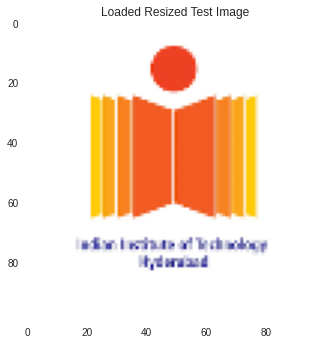

In [88]:
path = r'Test.jpg'
# Here I am Reading Image
img = cv2.imread(path)
# Here I am Swapping Color channels due to OpenCV
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Resize the image
img = cv2.resize(img, (100, 100))
# Here I am Normalizing Image [ 0-255 ---> 0-1 ] 
img = np.divide(img, [255,255,255])
# Here I am Plotting the Image
ShowImage(img,title="Loaded Resized Test Image")

# Question 1

---

I Have created convolution function as asked. Takes Image as input and performs convolution using provided kernel with given padding and stride. It returns convoluted 2d image.

In [89]:
# This are some of the activation function commonly used.

def Sigmoid(x):
  return 1/(1 + np.exp(-x))

def Relu(x):
  z = np.zeros(x.shape[0])
  f = np.maximum(x, z)
  return f

def Tanh(x):
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def P_Relu(x):
  a = np.random.randn(1,1)
  return (np.maximum(0, x) + a * np.minimum(0, x))
  
def softmax(x):
 return np.exp(x) / np.exp(x).sum()

In [90]:
def Convolution(img,ker,activation = "Sigmoid",pad=0,sti=1):
  """
  This Function will apply convolution with padding, stride and mentioned Non-linearity.
  """

  # Getting Image Dimentions
  H, W, K = img.shape[0],img.shape[1],img.shape[2]
  # Getting Kernel Dimentions
  h, w, k = ker.shape[0],ker.shape[1],ker.shape[2]

  # Finding Output Image Shape
  nH = int(( H - h + 2 * pad ) / sti + 1)
  nW = int(( W - w + 2 * pad ) / sti + 1)

  # Finding Padded Image Shape
  pH = int(H + 2 * pad )
  pW = int(W + 2 * pad )
  pK = int(K)

  # Check for padding
  if pad != 0:
    
    # Creating Blank Image [white Image] [White Padding]
    pad_img = np.full((pH,pW,pK), (1.0,1.0,1.0))
    # Finding location to put Image on blank image
    x = (pW - W) // 2
    y = (pH - H) // 2
    # Putting our image on top
    pad_img[y:y + H , x:x + W,:] = img
    
    # This is just to see Padded Image [UNCOMMENT TO TEST]
    # ShowImage(pad_img,title="Padded Image")
  else:
    pad_img = img

  # Normalizing Image [Due to some error, might not required but doesn't hurt]
  pad_img = ((pad_img - pad_img.min()) * (1/(pad_img.max() - pad_img.min()) * 1))

  # Intitializing output Image
  cnv_img = np.zeros((nH,nW))

  x,y = 0,0
  # iter over padded image - kernel size + 1
  for row in range(pH-h+1):
    # Skipping For Stride
    if row % sti == 0:
      x = 0
      for col in range(pW-w+1):
        # Skipping For Stride
        if col % sti == 0:
          pix = 0
          # Kernel Operation over each channel
          for i in range(h):
            for j in range(w):
              for d in range(k):
                pix += pad_img[row + i ][col + j][d] * ker[i][j][d]
          cnv_img[y][x] = pix
          x+=1
      y+=1
  
  # Normalizing Image
  cnv_img = ((cnv_img - cnv_img.min()) * (1/(cnv_img.max() - cnv_img.min()) * 1))

  # Adding Non-Linearity to whole Image at once
  if activation == "Sigmoid":
    cnv_img = Sigmoid(cnv_img)
  elif activation == "Relu":
    cnv_img = Relu(cnv_img)
  elif activation == "Tanh":
    cnv_img = Tanh(cnv_img)
  elif activation == "PRelu":
    cnv_img = P_Relu(cnv_img)
  return cnv_img


Image Shape[BEFORE CONVOLUTION]:  (100, 100, 3)


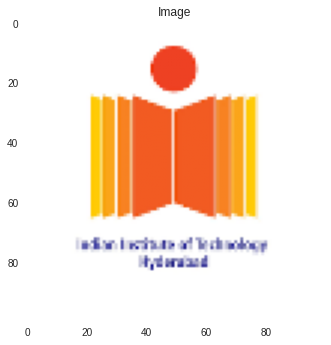

____________________________________________________________________________________________________ 

Kernel Used:  (3, 3, 3)


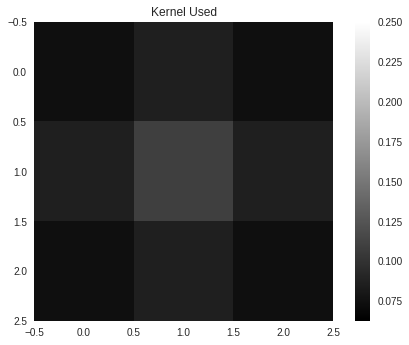

____________________________________________________________________________________________________ 

Image Shape[AFTER CONVOLUTION]:  (98, 98)


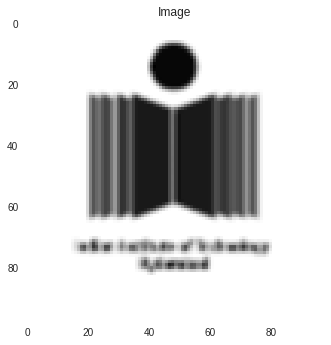

In [91]:
# Testing the Conv function

# This is Simple Blur Kernel
blur_ker = np.array([[[0.0625,0.0625,0.0625],[0.125,0.125,0.125],[0.0625,0.0625,0.0625]],
                    [[0.125,0.125,0.125],[0.25,0.25,0.25],[0.125,0.125,0.125]],
                    [[0.0625,0.0625,0.0625],[0.125,0.125,0.125],[0.0625,0.0625,0.0625]]])

# This is just to test Random kernel with bigger size [UNCOMMENT BELOW LINE TO TEST]
# blur_ker = np.random.rand(15,15,3)

cnv_img = Convolution(img,blur_ker,activation="Sigmoid",pad=0,sti=1)

print("Image Shape[BEFORE CONVOLUTION]: ",img.shape)
ShowImage(img)

print("_"*100,'\n')

print("Kernel Used: ",blur_ker.shape)
ShowImage(blur_ker,title="Kernel Used",CLR_BAR=True,gray=True)

print("_"*100,'\n')

print("Image Shape[AFTER CONVOLUTION]: ",cnv_img.shape)
ShowImage(cnv_img,gray = True)



# Question 2

---

I Have created Pooling function as asked. takes input 2d image and returns the pooled image with define type of pooling.

In [92]:
def Pool(img, MaxOrAvg = 'Max'):
  """
  This simple function I have built to apply Max or Avg operation on kernel size chunk of image
  """
  if MaxOrAvg == 'Max':
    return max(np.squeeze(img[:,:].reshape(1,-1)))
  elif MaxOrAvg == 'Avg':
    return (sum(np.squeeze(img[:,:].reshape(1,-1)))/img.shape[0])


In [93]:
def Pooling(img,pool = 'Max',sti = 2):
  """
  This is the simple pooling function.
  """
  # Getting Image Dimentions
  H, W = img.shape[0],img.shape[1]
  # Getting Kernel Dimentions
  k = sti 

  # Output Image Dimentions
  nH = int(( H - k  ) / sti + 1)
  nW = int(( W - k  ) / sti + 1)

  # Initializing Output Image
  cnv_img = np.zeros((nH,nW),dtype="float64")

  # This is pooling implementation
  x,y = 0,0
  for row in range(H-k+1):
    # Skipping For Stride
    if row % sti == 0:
      x = 0
      for col in range(W-k+1):
        # Skipping For Stride
        if col % sti == 0:
          # Appropriate Pool Function over chunk of image
          cnv_img[y][x] = Pool(img[row:row+k,col:col+k],pool)
          x+=1
      y+=1
  
  # Normalizing 
  cnv_img = ((cnv_img - cnv_img.min()) * (1/(cnv_img.max() - cnv_img.min()) * 1))

  return cnv_img

Orignal Image | Shape: (98, 98)


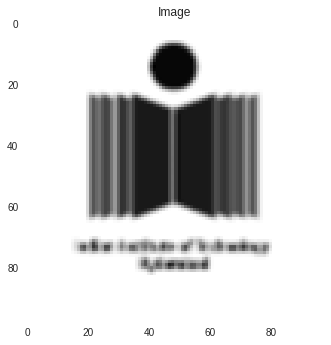

____________________________________________________________________________________________________ 

Max Pooling | Out Shape: (49, 49)


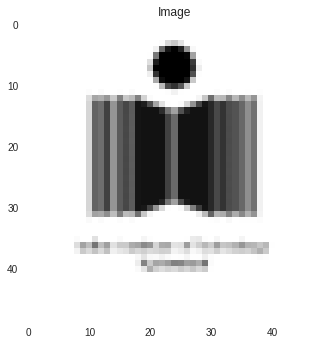

____________________________________________________________________________________________________ 

Avg Pooling | Out Shape: (50, 50)


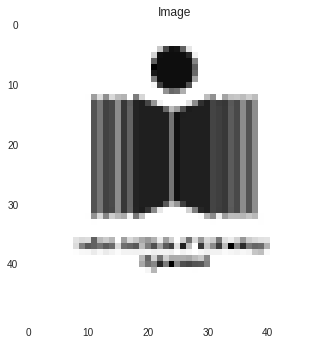

In [94]:
# Testing the Conv function

print("Orignal Image | Shape:",cnv_img.shape)
ShowImage(cnv_img ,gray = True)

print("_"*100,'\n')

cnv_img = Pooling(cnv_img,pool = 'Max',sti=2)
print("Max Pooling | Out Shape:",cnv_img.shape)
ShowImage(cnv_img,gray = True)

print("_"*100,'\n')

cnv_img = Pooling(img,pool = 'Avg',sti=2)
print("Avg Pooling | Out Shape:",cnv_img.shape)
ShowImage(cnv_img,gray = True)

# Question 3

---

Created Convolution layer and ran convolution function multiple times for each kernel.

In [95]:
def Convolution_layer(img_vol,Nfilt,ker_vol,activation = "Sigmoid", pad=0,sti=1):
  """
  This is the function which can apply convolution for multiple kernels using previous function
  """
  Channels = []
  # Applying Convolution for every kernel
  for i in range(Nfilt):
    Channels.append(Convolution(img_vol,ker_vol[i],activation,pad,sti))
  # Merging all output as channels
  # I have asked sir that can i use cv2.merge() and he approved [In Mail]
  return cv2.merge(Channels)


# Some Kernels defined manually
# Blur Kernel
blur_ker = np.array([[[0.0625,0.0625,0.0625],[0.125,0.125,0.125],[0.0625,0.0625,0.0625]],
                    [[0.125,0.125,0.125],[0.25,0.25,0.25],[0.125,0.125,0.125]],
                    [[0.0625,0.0625,0.0625],[0.125,0.125,0.125],[0.0625,0.0625,0.0625]]])
# Shaprpness Kernel
sharpe_ker = np.array([[[0,0,0],[-1,-1,-1],[0,0,0]],
                      [[-1,-1,-1],[5,5,5],[-1,-1,-1]],
                      [[0,0,0],[-1,-1,-1],[0,0,0]]])

# Multi Kernel  
New_Ker_vol1 = np.array([
    [
        [[0.0625,0.0625,0.0625],[0.125,0.125,0.125],[0.0625,0.0625,0.0625]],
        [[0.125,0.125,0.125],[0.25,0.25,0.25],[0.125,0.125,0.125]],
        [[0.0625,0.0625,0.0625],[0.125,0.125,0.125],[0.0625,0.0625,0.0625]]
    ],
    [
        [[0,0,0],[-1,-1,-1],[0,0,0]],
        [[-1,-1,-1],[5,5,5],[-1,-1,-1]],
        [[0,0,0],[-1,-1,-1],[0,0,0]]
    ]
])

In [96]:
# Testing Convoltion Layer 

print("Orignal Image          | Shape:",img.shape)

# This is the values of random kernel
# Index are : 
# No. of Kernel, kernel size Height, kernel size Width , No. of Channnel in image

#  Random Kernel
New_Ker_vol2 = np.random.rand(5,5,5,3)
cnv_img = Convolution_layer(img,New_Ker_vol2.shape[0],New_Ker_vol2,pad=1,sti=2)
print("After 1st Convoltion   | Shape:",cnv_img.shape)

#  Random Kernel
New_Ker_vol3 = np.random.rand(10,3,3,5)
cnv_img = Convolution_layer(cnv_img,New_Ker_vol3.shape[0],New_Ker_vol3,pad=0,sti=2)
print("After 2nd Convoltion   | Shape:",cnv_img.shape)


#  Random Kernel
New_Ker_vol4 = np.random.rand(20,3,3,10)
cnv_img = Convolution_layer(cnv_img,New_Ker_vol4.shape[0],New_Ker_vol4,pad=0,sti=2)
print("After 3rd Convoltion   | Shape:",cnv_img.shape)

Orignal Image          | Shape: (100, 100, 3)
After 1st Convoltion   | Shape: (49, 49, 5)
After 2nd Convoltion   | Shape: (24, 24, 10)
After 3rd Convoltion   | Shape: (11, 11, 20)


# Question 4

---


In [97]:
def Pooling_layer(img_vol,pool='Max',sti=2):
  """
  This is the pooling layer functoin.
  """
  if pool == 'GAP':
    channels = []
    # Finding size of image/matrix
    size = img_vol.shape[0] * img_vol.shape[1] 
    for c in range(img_vol.shape[2]):
      #  Taking Avg over whole 2d image/matrix
      channels.append(sum((np.squeeze(img_vol[:,:,c].reshape(1,-1))))/size)
    return channels
  
  if len(img_vol.shape) > 2:
    channels = []
    #  Iter through all channel
    for c in range(img_vol.shape[2]):
      # calling pooling function for all individual channel
      channels.append(Pooling(img_vol[:,:,c],pool,sti))
    # All functionality is alredy handled in Question 2 it self so just a function call here.
    return cv2.merge(channels)

  else:
    return Pooling(img_vol,ker,pool,pad,sti)


Image Shape[Before Pooling]:  (100, 100, 3)


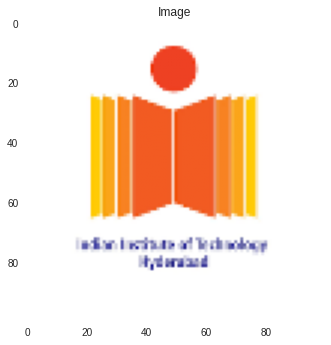


Applied Avg Pooling [Kernel 2x2] [Stride 2]
Image Shape[AFTER  Pooling]:  (50, 50, 3)


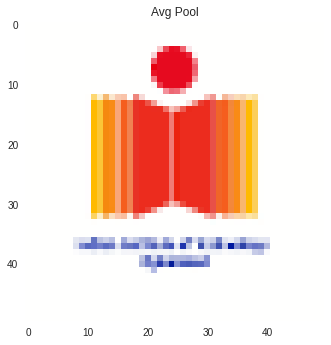

____________________________________________________________________________________________________ 

Test On IMAGE VOLUME [Kernel 3x3] [Stride 3]
Image Shape[Before Pooling]: (75, 75, 5)
Image Shape[AFTER  Pooling]: (25, 25, 5)
____________________________________________________________________________________________________ 

Test for GAP:
Image Shape[Before GAP]:  (100, 100, 3)
GAP Output: [0.9805850980392247, 0.8775137254902049, 0.8050392156862655]


In [98]:
# Testing pooling Layer 

print("Image Shape[Before Pooling]: ",img.shape)
ShowImage(img)
pool_img = Pooling_layer(img,pool = 'Avg',sti=2)
print("\nApplied Avg Pooling [Kernel 2x2] [Stride 2]")
print("Image Shape[AFTER  Pooling]: ",pool_img.shape)
ShowImage(pool_img,title="Avg Pool")
print("_"*100,'\n')

Test_Img = np.random.rand(75,75,5)
pool_img = Pooling_layer(Test_Img,pool = 'Max',sti=3)
print("Test On IMAGE VOLUME [Kernel 3x3] [Stride 3]")
print("Image Shape[Before Pooling]:",Test_Img.shape)
print("Image Shape[AFTER  Pooling]:",pool_img.shape)
print("_"*100,'\n')

gap_pool = Pooling_layer(img,pool = 'GAP',sti=2)
print("Test for GAP:")
print("Image Shape[Before GAP]: ",img.shape)
print("GAP Output:",gap_pool)


# Question 5

---


In [113]:
# flattern array with associated weights of specified size
def Flattern(Inp,Out_size=0):
  """
  This is a function that returns the flattern array with respective output size.
  """
  # if 0 only flattern with no weight associated
  if Out_size != 0:
    # Input reshape
    input = Inp.reshape(1,-1)
    input_size = input.shape[0]
    # random weight init.
    W = np.random.rand(Out_size,input_size)
    # return dot prod
    return np.dot(W,input)
  else:
    return Inp.reshape(1,-1)

print("Image Shape:                |",cnv_img.shape)
print("Image Shape multiplication: |",' x '.join([str(i) for i in cnv_img.shape])," = ",np.prod(cnv_img.shape))
print("Output size of flattern:    |",(Flattern(cnv_img ,1)).shape)

Image Shape:                | (11, 11, 20)
Image Shape multiplication: | 11 x 11 x 20  =  2420
Output size of flattern:    | (1, 2420)


# Question 6

---

I have implemented MLP as asked

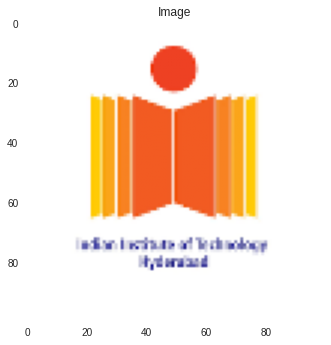

(1, 30000)
Image Shape[Before Pooling]:    (100, 100, 3)
Size After flattern:            30000
____________________________________________________________________________________________________ 

Normalized Output of MLP: 
[1. 0.]
____________________________________________________________________________________________________ 

Softmax Output of MLP: 
[0.73105858 0.26894142]


In [114]:
def MLP(inp,NoHidL,HidSize,Activation,OutLSize):
  """
  This is Simple MLP only for feed forward with random weights.
  """
  inpSize = len(inp)
  W = []
  B = []
  Lastw = inpSize

  #  Randomly Init Weights and Bias.
  for i in range(NoHidL):
    w = np.random.rand(Lastw,HidSize[i])
    W.append(w)

    b = np.random.rand(HidSize[i])
    B.append(b)

    Lastw = HidSize[i]

  w = np.random.rand(Lastw,OutLSize)
  W.append(w)

  b = np.random.rand(OutLSize)
  B.append(b)

  # Forward pass with given non-linearity
  if Activation == "Sigmoid":
    z1 = Sigmoid(np.matmul(inp,W[0])+B[0]) # output layer 1 
    for i in range(1,len(W)-1):
      z1 = Sigmoid(np.matmul(z1,W[i])+B[i]) # output Hidden layers

  elif Activation == "Relu":
    z1 = Relu(np.matmul(inp,W[0])+B[0]) # output layer 1 
    for i in range(1,len(W)-1):
      z1 = Relu(np.matmul(z1,W[i])+B[i])# output Hidden layers

  z1 = np.matmul(z1,W[-1])+B[-1]  # Output of the Output layer

  # Normalize output before returning to avoide overflow error in softmax due to exp.
  z1 = ((z1 - z1.min()) * (1/(z1.max() - z1.min()) * 1))
  return z1

ShowImage(img)
Inp_Vec = Flattern(img,0)
print(Inp_Vec.shape)
print("Image Shape[Before Pooling]:   ",img.shape)
print("Size After flattern:           ",Inp_Vec.shape[1])
print("_"*100,'\n')

output = MLP(np.squeeze(Inp_Vec),1,[Inp_Vec.shape[1]],"Sigmoid",2)

print("Normalized Output of MLP: ")
print(output)
print("_"*100,'\n')
print("Softmax Output of MLP: ")
print(softmax(output))



# Question 7

---

* First I have shown some operation on dataset
* after that i have shown CNN feed forward on same


Train:  (50000, 32, 32, 3) (50000, 1)
Test:   (10000, 32, 32, 3) (10000, 1)


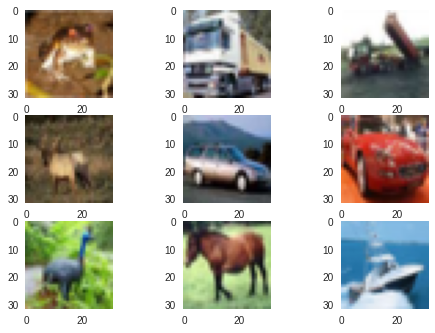

In [115]:
# loading the cifar10 dataset
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# loaded dataset size
print("Train: ", trainX.shape, trainy.shape)
print("Test:  " , testX.shape, testy.shape)

for i in range(9):
  plt.subplot(331 + i)
  plt.imshow(trainX[i])
  plt.grid()
plt.show()

# Classes in dataset
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Image Label:  frog
Image Shape[Before Convolution]:  (100, 100, 3)


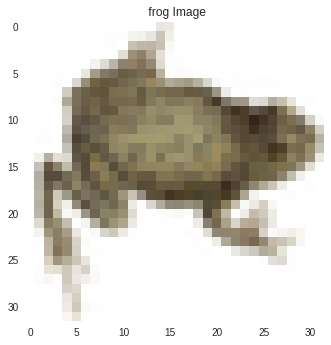

____________________________________________________________________________________________________ 

Image Shape[After Convolution]:  (32, 32, 2)


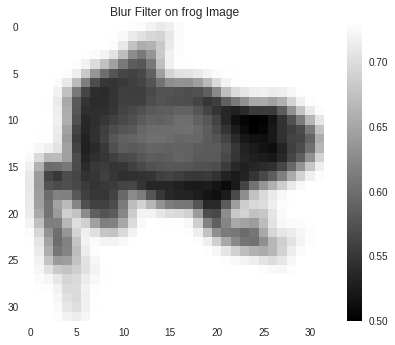

____________________________________________________________________________________________________ 



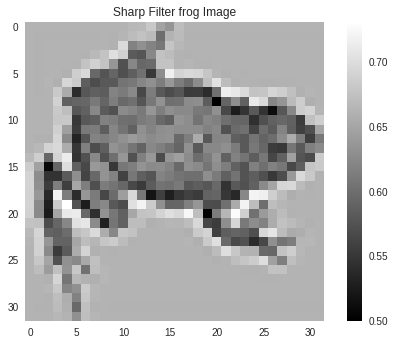

In [116]:
#  Here I am running convolution layer on random cifr10 images just to test

# Load Random image
ind = np.random.randint(50000)
img_cifr = trainX[ind]
# Normalizze Image
img_cifr = np.divide(img_cifr, [255,255,255])

print("Image Label: ",classes[trainy[ind][0]])
cnv_img = Convolution_layer(img_cifr,New_Ker_vol1.shape[0],New_Ker_vol1,pad=1,sti=1)
print("Image Shape[Before Convolution]: ",img.shape)
ShowImage(img_cifr, title=" " + str(classes[trainy[ind][0]])+ " Image")
print("_"*100,'\n')
print("Image Shape[After Convolution]: ",cnv_img.shape)
ShowImage(cnv_img[:,:,0],True,True,title="Blur Filter on " + str(classes[trainy[ind][0]])+ " Image")
print("_"*100,'\n')
ShowImage(cnv_img[:,:,1],True,True,title="Sharp Filter " + str(classes[trainy[ind][0]])+ " Image")

In [117]:
def FeedForward(img,GAP_REQ = True,MLP_REQ = True,SOFT_REQ=True):
  """
  This function uses all above functions in order to implement CNN feed forward.

  GAP_REQ  = Implement Gap of Flattern
  MLP_REQ  = Do Fully connected MLP at end or not
  SOFT_REQ = Apply Softmax on output or not

  """
  # No of Kernel, kernel size H, kernel size W, No of Channnel
  # Randomly initialized kernel
  Ker_Vol1 = np.random.rand(16,3,3,3)
  cnv_img = Convolution_layer(img,Ker_Vol1.shape[0],Ker_Vol1,"Sigmoid",pad=0,sti=1)
  cnv_img = Pooling_layer(cnv_img,pool = 'Max',sti=2)


  # Randomly initialized kernel
  Ker_Vol2 = np.random.rand(8,3,3,16)
  cnv_img = Convolution_layer(cnv_img,Ker_Vol2.shape[0],Ker_Vol2,"Sigmoid",pad=0,sti=1)
  cnv_img = Pooling_layer(cnv_img,pool = 'Max',sti=2)
  
  # Option to apply Gap or flattern
  gap_cnv = []
  if GAP_REQ:
    gap_cnv = Pooling_layer(cnv_img,pool = 'GAP',sti=1)
  else:
    gap_cnv = Flattern(cnv_img)

  # Option to apply MLP
  if MLP_REQ:
    output = MLP(gap_cnv,1,[len(gap_cnv)],"Sigmoid",10)

     # Option to check softmax required or not
    if SOFT_REQ:
      return softmax(output)
    return output

  return gap_cnv


In [118]:
def printOut(vec):
  """
  This is a simple function to print the softmax output.
  """
  print(" | ",end='')
  for v in vec:
    print("%1.6f"%v,end = " | ")


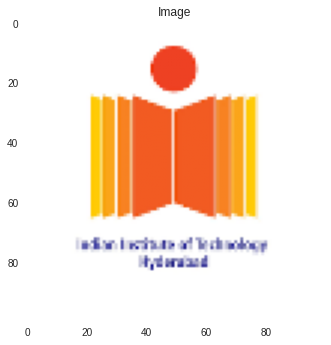

____________________________________________________________________________________________________ 

Normalized Output of Feed-forward pass: 
 | 0.890172 | 0.401114 | 0.571786 | 0.375144 | 0.606869 | 0.000000 | 1.000000 | 0.957045 | 0.446800 | 0.290660 | 
 ____________________________________________________________________________________________________ 

Softmax Output of Feed-forward pass: 
 | 0.133724 | 0.082000 | 0.097261 | 0.079898 | 0.100733 | 0.054905 | 0.149248 | 0.142972 | 0.085833 | 0.073425 | 

In [119]:
# Testion the feed forward
ShowImage(img)
print("_"*100,'\n')
output = FeedForward(img,SOFT_REQ=False)
print("Normalized Output of Feed-forward pass: ")
printOut(output)
print('\n',"_"*100,'\n')
print("Softmax Output of Feed-forward pass: ")
printOut(softmax(output))

# Question 8

---
* I have implemented feed forward pass on each sample of 10 classes and ploted softmax for the same.



#### (a) Do you see any trend in the output vectors?

* We can see that all classes have probability distributed near to 1/10 or (1 / # of classes). 
* And we can see atleast 6 to 7 classes in output so it's not like it only returns 1 class for every input.
* we can conclude that it's not biased toward any perticular class.

In [120]:
#  Here i have ran FeedForward pass for 10 times for image with 10 diff classes

for i in range(10):
  ind = np.where(trainy == [i])[0][0]
  img_cifr = np.divide(trainX[ind], [255,255,255])
  output = FeedForward(img_cifr)
  printOut(output)
  print(str(classes[np.argmax(output)] == classes[trainy[ind][0]]).ljust(5, ' ') ,end =' | ')
  print(classes[np.argmax(output)].center(5, ' ') ,'|', classes[trainy[ind][0]].center(5, ' ') ,'|')


 | 0.077284 | 0.094285 | 0.128671 | 0.151893 | 0.077062 | 0.092214 | 0.119310 | 0.119526 | 0.083877 | 0.055878 | False |  cat  | plane |
 | 0.116878 | 0.156607 | 0.060042 | 0.082768 | 0.069532 | 0.102401 | 0.064998 | 0.163211 | 0.075199 | 0.108364 | False | horse |  car  |
 | 0.086917 | 0.063339 | 0.172175 | 0.089074 | 0.086151 | 0.111542 | 0.079366 | 0.110710 | 0.079274 | 0.121452 | True  |  bird |  bird |
 | 0.075398 | 0.071020 | 0.081550 | 0.087407 | 0.121971 | 0.076082 | 0.110590 | 0.175654 | 0.135710 | 0.064619 | False | horse |  cat  |
 | 0.162006 | 0.102146 | 0.098592 | 0.133914 | 0.106174 | 0.059599 | 0.076434 | 0.103237 | 0.091516 | 0.066382 | False | plane |  deer |
 | 0.138362 | 0.055254 | 0.120565 | 0.060337 | 0.114417 | 0.096334 | 0.105939 | 0.150196 | 0.092164 | 0.066432 | False | horse |  dog  |
 | 0.151527 | 0.162898 | 0.060720 | 0.094882 | 0.072142 | 0.129635 | 0.075751 | 0.096783 | 0.059927 | 0.095736 | False |  car  |  frog |
 | 0.080536 | 0.053015 | 0.124768 | 0.131

#### (b) Does a randomly initialized network show any discriminability?
* Plot completly shows a random distribution in 2 dimention, like images with same class doesn't lie in same area. (Because of Random Weights in Convolution Kernel)


In [121]:
def ShowPCAplot(X,Y):
  """
  This is a Simple Function to plot PCA Plot.
  """
  plot = plt.scatter(X[:,0], X[:,1], c=Y, cmap="tab20")
  plt.legend(handles=plot.legend_elements()[0], labels=list(classes), loc='center left', bbox_to_anchor=(1, 0.5))
  plt.title("2D Representation of Forward pass of CIFR10 Images")
  plt.grid()
  plt.show()

(30, 8)
(30,)


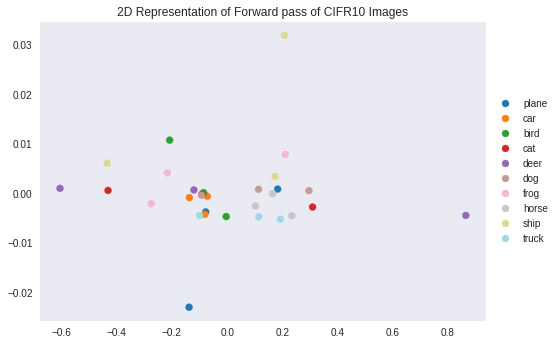

In [122]:
#  Simple Pca on flattern convoluted Images 
PCA_X = []
PCA_y = []

for i in range(10):
  # find 3 images for class i
  ind1,ind2,ind3 = np.where(trainy == [i])[0][0] ,  np.where(trainy == [i])[0][1], np.where(trainy == [i])[0][2]

  #  Normalize image
  img_cifr1 = np.divide(trainX[ind1], [255,255,255])
  img_cifr2 = np.divide(trainX[ind2], [255,255,255])  
  img_cifr3 = np.divide(trainX[ind3], [255,255,255])  

  #  Run feed forward pass without MLP and do flattern insted of GAP
  #  Apply PCA to reduce dimention to 2
  PCA_X.append(FeedForward(img_cifr1, GAP_REQ = True, MLP_REQ = False))
  PCA_X.append(FeedForward(img_cifr2, GAP_REQ = True, MLP_REQ = False))
  PCA_X.append(FeedForward(img_cifr3, GAP_REQ = True, MLP_REQ = False))

  # append label of all 
  PCA_y.append(trainy[ind1][0])
  PCA_y.append(trainy[ind2][0])
  PCA_y.append(trainy[ind3][0])

# convert to np array
PCA_X = np.array(PCA_X)
PCA_y = np.array(PCA_y)

print(PCA_X.shape)
print(PCA_y.shape)

# Apply PCA 
pca = PCA(n_components=2)
X2d =  pca.fit_transform(PCA_X)

# Show Plot
ShowPCAplot(X2d,PCA_y)